# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2000-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code
###YOUR CODE HERE###
# remove row which has 'NaN' values
gdp_tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0).dropna()

# Drop everything but "name of country" and "data by year(2000 ~ 2015)"
gdp_tsv1 = gdp_tsv.iloc[:,24:34]
gdp_tsv2 = gdp_tsv.iloc[:,34:-1]

# modify data type as float type, 
gdp_tsv1 = gdp_tsv1.replace(',','', regex=True).astype(float)
gdp_tsv2 = gdp_tsv2.replace(',','', regex=True).astype(float)
# group every 5/6 columns and get median values; convert them to int types, and rename names of columns
gdp_tsv1 = gdp_tsv1.groupby(np.arange(len(gdp_tsv1.columns))//5, axis=1).median().astype('int64')
gdp_tsv2 = gdp_tsv2.groupby(np.arange(len(gdp_tsv2.columns))//6, axis=1).median().astype('int64')

result_gdp = pd.concat([gdp_tsv1, gdp_tsv2], axis=1)
result_gdp.columns = ['2000-2005', '2005-2010', '2010-2015']

IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
result_IM = IMtsv.drop(IMtsv.columns[0:10], axis=1)

# Delete country row from DroppedIMtsv & resulttsv until the two tables include same number of countries
result_IM = result_IM[result_IM.index.isin(result_gdp.index)]
result_gdp = result_gdp[result_gdp.index.isin(result_IM.index)]

# Concatenate 3 columns into one, and remove 'Country' index from GDP tsv
final_gdp = pd.concat([result_gdp['2000-2005'], result_gdp['2005-2010'], result_gdp['2010-2015']]).to_frame()
final_IM = pd.concat([result_IM['2000-2005'], result_IM['2005-2010'], result_IM['2010-2015']]).to_frame()

final_gdp.columns = ['2000-2015']
final_IM.columns = ['2000-2015']

In [3]:
lr = LinearRegression()

# convert 1D array xData(342,) to 2D array xData(342, 1)
xData = final_gdp['2000-2015'].values[:, np.newaxis]
yData = final_IM['2000-2015'].values

#TODO
lr.fit(xData, yData)
y_pred = lr.predict(xData)

print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  635.0250787937521


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [4]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize

# Scale individual samples to have unit norm
x_normalized = normalize(xData, norm='l2', axis=0)

for deg in range(10):
    # This pipeline takes our xData, creates polynomial features, and does a linear fit on them.
    PolynomialRegression = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(normalize=True))
    
    # Then we can treat this like a single model and not explicitly worry about the steps.
    plr = PolynomialRegression.fit(x_normalized, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(x_normalized), yData))

MSE - poly-linear regression; degree= 0 :  908.2880607639959
MSE - poly-linear regression; degree= 1 :  635.0250787937521
MSE - poly-linear regression; degree= 2 :  527.2070887274822
MSE - poly-linear regression; degree= 3 :  445.0779259343032
MSE - poly-linear regression; degree= 4 :  398.3763940853926
MSE - poly-linear regression; degree= 5 :  358.2493964065132
MSE - poly-linear regression; degree= 6 :  333.5783640029589
MSE - poly-linear regression; degree= 7 :  317.1575263971416
MSE - poly-linear regression; degree= 8 :  305.9627071601355
MSE - poly-linear regression; degree= 9 :  300.29535640939366


### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



**현재 방법의 문제: Train-test split를 하지 않았다.**

위에서 확인할 수 있는 것처럼 다항 차수를 높이면 높일수록, MSE가 낮아지며 모델이 데이터에 잘 맞게 된다. 그러나 이는 과적합(Overfitting)으로 이어져, traning data인 xData에는 매우 잘 맞지만 새로운 Data에 대해서는 잘 예측하지 못하는 문제가 생긴다.

그래서 "다른 데이터"를 사용해 모델을 평가하고, 파라미터를 조정하는 작업이 필요하다. 이는 주어진 데이터를 traning data와 test data로 나누어 학습 모델을 학습하고, 검증해야 한다. test data에 대해서도 좋은 성능을 보이면 학습 모델이 잘 동작하고 있다는 좋은 신호이다.

### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [8]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size=0.2, shuffle=True)

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(normalize=True))
    
    # You should normalize train and val data respectively after split.
    x_train_norm = normalize(x_train, norm='l2', axis=0)
    plr = PolynomialRegression.fit(x_train_norm, y_train)
    x_val_norm = normalize(x_val, norm='l2', axis=0)
    
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train_norm), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val_norm), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  821.623686511291 ,	val:  1257.1836112112762
MSE - sklearn poly-linear regression; degree= 1 
	train:  591.2181264988642 ,	val:  1066.5972174055887
MSE - sklearn poly-linear regression; degree= 2 
	train:  491.7717743523634 ,	val:  808.9962430034154
MSE - sklearn poly-linear regression; degree= 3 
	train:  419.30299934232454 ,	val:  1043.1507158990225
MSE - sklearn poly-linear regression; degree= 4 
	train:  377.21950701574826 ,	val:  1629.7937851928662
MSE - sklearn poly-linear regression; degree= 5 
	train:  339.9151358720186 ,	val:  4150.747985466091
MSE - sklearn poly-linear regression; degree= 6 
	train:  315.6591328902933 ,	val:  12812.614996720053
MSE - sklearn poly-linear regression; degree= 7 
	train:  299.1136738675626 ,	val:  51285.84530268707
MSE - sklearn poly-linear regression; degree= 8 
	train:  288.0338592586453 ,	val:  329864.5520371606
MSE - sklearn poly-linear regression; degree= 9 
	train:  282.3950444575969 

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

**World Bank의 'World Development Indicators'자료를 사용한다.**
https://datacatalog.worldbank.org/dataset/world-development-indicators

위 자료는 1960년부터 2017년까지 전 세계 국가들의 발전관련 지표들을 모아놓은 자료이다. 이 중 '농작물 생산 지표(Crop Production Index)'과 '곡물 수확량(Cereal Yield)'를 사용해 feature를 더하고자 한다. 이는 사망률이 영양실조와 관련이 있다고 생각하기 때문이다. 따라서 농작물을 얼마나 생산하고 수확하는지가 사망률과 어떤 관련이 있는지 비교해 볼 것이다. 이 지표를 선택한 다른 이유는 공란으로 채워져 있는 다른 다른 수많은 지표들에 비해, 거의 모든 국가들에 공통으로 자료가 존재해 유의미한 비교가 가능하기 때문이다.


## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [20]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv', index_col=0)

In [21]:
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [ ]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

In [22]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    # Use 'stride_tricks'.
    as_strided = np.lib.stride_tricks.as_strided
    x_data = as_strided(col_data, (len(col_data) - lookback, lookback), col_data.strides*2)
    y_datas = col_data[lookback:]
   ##########################    
#    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)

    return x_data, y_data


In [18]:
"""
TODO : make split_data function which split train / test (8/2 rate)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

In [23]:
from sklearn.model_selection import train_test_split

def split_data(x,y):
    ##### Your Code Here ####
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    ###########################
    return x_train, x_test, y_train, y_test

In [24]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [25]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [ ]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    # PolynomialFeatures (prepreprocessing)
    poly = PolynomialFeatures(degree=poly_degree, interaction_only=False)
    x_train_ = poly.fit_transform(x_train)
    x_test_ = poly.fit_transform(x_test)
    
    # fit linear model to training set, and predict test set
    model = linear_model.LinearRegression()
    model.fit(x_train_, y_train)
    test_pred = model.predict(x_test_)
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train_), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(x_test_), y_test))
    print("Test Set Accuracy: %.4f"%model.score(x_test_, y_test))
    return test_pred, y_test

In [27]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Adj Close', lookback_days=30, poly_degree=2)

MSE - Train 5.6887
MSE - Test 2490.1394
Test Set Accuracy: 0.9789


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :   'Adj Close'    <br/>
Lookback :   30    <br/>
Poly_degree :   2    <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

#### 1
- **Overfitting: 학습 모델이 training set에만 지나치게 적합한 현상으로, training set에 대해서는 좋은 성능을 보여주지만 test set에 대해서는 좋은 성능을 나타내지 못하는 것이다. 과도한 polynomial features의 사용 등으로 인해 발생한다.** 

  실제로 위의 run_regression 함수에서 poly_degree를 높이면, train의 MSE는 0에 가까워지지만 test의 MSE는 기하급수적으로 커진다는 것을 알 수 있다. 그 예로 lookback_days을 10으로, poly_degree는 5로 설정했을 때, training set의 MSE는 0.32지만 test set의 MSE는 991270938795427라는 값을 보이는 것을 확인할 수 있었다.

- **Underfitting: 모델이 너무 단순해서 training set과 test set 모두에 대해 좋은 성능을 보이지 못하는 현상이다. 이는 polynomial features의 사용과 정규화 값(lamda)를 줄이는 방법 등으로 해결될 수 있다.**

  실제로 run_regression 함수에서 poly_degree를 0으로 설정하면, training set과 training set의 MSE가 모두 높은 것을 확인할 수 있었다.

#### 2
- train data의 MSE loss를 0에 가까이 줄일 수 있지만, 이는 overfitting으로 이어진다. 이는 기존의 traning data는 매우 잘 예측하지만, 새로운 정보는 제대로 예측하지 못하는 문제가 발생한다. 따라서 train data와 test data의 MSE loss를 균형있게 조정하는 것이 필요하다. 

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [28]:
# TODO : Assign your best prediction for test data to best_pred
 
best_pred, y_test = run_regression(raw_data, column_name='Adj Close', lookback_days=5, poly_degree=1)

MSE - Train 8.6340
MSE - Test 178.9263
Test Set Accuracy: 0.9985


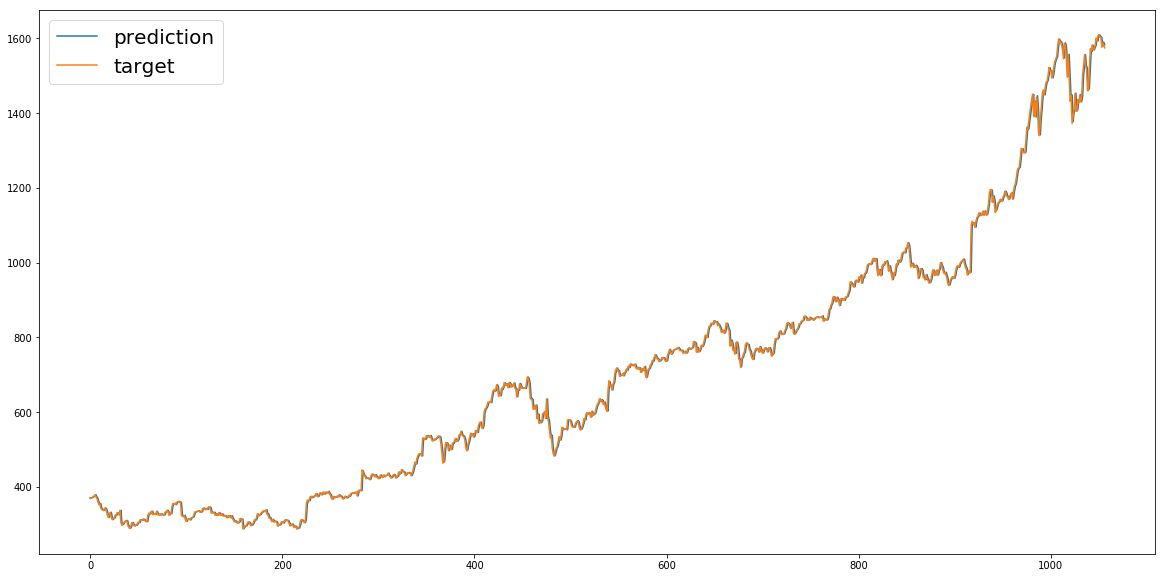

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [31]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv', sep='\t', index_col=False)
amazon_review.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [34]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    ###YOUR CODE HERE###
    # make a corpus from Amazon reviews
    reviews = list()
    for i in range(len(data)):
        reviews.append(data['Review'][i])

    bow = vectorizer.fit(reviews).transform(reviews)
    return vectorizer, bow

In [35]:
vectorizer, bow = make_review_bow(amazon_review)
bow = bow.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df.head()
#print(len(vectorizer.get_feature_names()))->we can know that we're working with 1847 features.

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [36]:
###YOUR CODE HERE###
from sklearn.model_selection import train_test_split
X = bow_df 
y = amazon_review['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1847), (200, 1847), (800,), (200,))

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
###YOUR CODE HERE###
# set the Classifier's loss function to logistic regression
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=1000)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [39]:
#from sklearn.metrics import accuracy_score
#sgdScore = accuracy_score(y_test, sgd_pred, normalize=True)
sgdScore = sgd.score(X_test, y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.855000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
###YOUR CODE HERE###
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [42]:
nbScore = nb.score(X_test, y_test)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.845000


### Problem 3-6 Select the Best Model with 4 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Split Data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###YOUR CODE HERE###
sgd2 = SGDClassifier(loss='log', penalty='l2', max_iter=1000)
param_grid = {'alpha': [0.0001, 0.0003, 0.001, 0.003]}

# Select Best parameter using GridSearchCV and 4-fold Cross Validation
grid_search = GridSearchCV(sgd2, param_grid, cv=4)
grid_search.fit(X_trainval, y_trainval)

print('======== SGD Classifier Result ========')
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best CV score: {:.2f}'.format(grid_search.best_score_))
print('Best Estimator among SGD:\n{}'.format(grid_search.best_estimator_))
print(classification_report(y_test, grid_search.predict(X_test)))

======== SGD Classifier Result ========
Test set score: 0.85
Best Parameter: {'alpha': 0.0001}
Best CV score: 0.80
Best Estimator among SGD:
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.83      0.86      0.85        93
          1       0.88      0.85      0.86       107

avg / total       0.86      0.85      0.86       200



In [44]:
###YOUR CODE HERE###
nb = MultinomialNB()
param_grid2 = {'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}

# Select Best parameter using GridSearchCV and 4-fold Cross Validation
grid_search2 = GridSearchCV(nb, param_grid2, cv=4)
grid_search2.fit(X_trainval, y_trainval)

print('====== Multinomial Naive Bayes Result ======')
print('Test set score: {:.2f}'.format(grid_search2.score(X_test, y_test)))
print('Best Parameter: {}'.format(grid_search2.best_params_))
print('Best CV score: {:.2f}'.format(grid_search2.best_score_))
print('Best Estimator among NB:\n{}'.format(grid_search2.best_estimator_))
print(classification_report(y_test, grid_search2.predict(X_test)))

====== Multinomial Naive Bayes Result ======
Test set score: 0.84
Best Parameter: {'alpha': 3}
Best CV score: 0.79
Best Estimator among NB:
MultinomialNB(alpha=3, class_prior=None, fit_prior=True)
             precision    recall  f1-score   support

          0       0.84      0.82      0.83        93
          1       0.85      0.87      0.86       107

avg / total       0.84      0.84      0.84       200



### YOUR ANSWER HERE [reason why you choose that model] ###

SGDClassifier와 MultinomialNB의 성능을 비교하기 위해, scikit-learn의 GridSearchCV를 사용해 매개변수를 조정해가며 두 분류기를 학습시키고 평가했다. 먼저, train_test_split을 사용해 훈련 세트 80%와 테스트 세트 20%를 나눴다. 그 후 param_grid로 두 분류기의 alpha 매개변수를 대상으로 가능한 많은 조합을 시도했다. 이후 GridSearchCV를 사용해 훈련 세트에서 '4-겹 계층별 교차 검증'을 실시하고, fit 메서드를 통해 교차 검증 성능이 가장 좋은 최적의 매개변수를 찾았다. 이후, 이 최적의 매개변수를 X_test와 y_test에 적용해 일반화 성능을 평가하였다.

**그 결과, SGD Classifer(alpha=0.0001)를 선택했다.** 두 분류기의 테스트 세트 정확도, 최적의 매개변수, 최고의 교차검증 정확도, 최적의 분류기, 각종 평가 점수들을 위에 표시했다. 그 결과, SGD는 alpha=0.0001에서 최적의 성능을 보였고, MultinomialNB은 alpha=3에서 최적의 성능을 보였다. 이 때 SGD와 MultinomialNB의 수치는 비슷하게 나오지만, SGD가 Test set score, Best CV score, precision, recall, f1-score 모든 수치에서 조금 우위를 보인다. 따라서 이러한 이유로 SGD Classifier를 선택했다. **그러나 SGD의 GridSearchCV는 연산시간이 오래 걸리지만, MultinomailNB보다 확연히 높은 성능을 보이지는 않는다. 그래서 data가 더욱 커진다면, MultinomialNB를 선택할 것이다.**

## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [45]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.sparse.csr import csr_matrix

### Problem 4-1 Pick 3 Categories you want and download

In [46]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = ['talk.politics.guns', 'talk.politics.mideast', 'sci.med']

In [47]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

the 20 newsgroups by date dataset
1136 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [48]:
print("Extracting features from the training dataset using a sparse vectorizer")
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,6),
                                   stop_words='english', min_df = 2, sublinear_tf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset.data)
tfidf_matrix

Extracting features from the training dataset using a sparse vectorizer


<1136x157622 sparse matrix of type '<class 'numpy.float64'>'
	with 586872 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [49]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=1)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(clusters[:10])

[2, 1, 2, 2, 2, 2, 2, 1, 1, 2]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [53]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

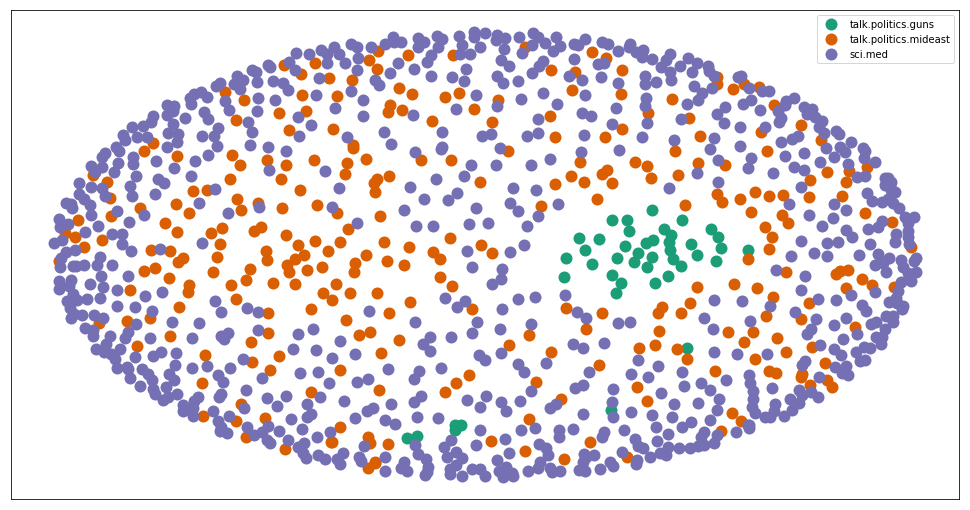

In [54]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    # group by cluster
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9)) # set size
    ax.margins(0.05) 
    # iterate through groups to layer the plot
    # Use 'cluster_name' and 'cluster_color' dicts with the 'name' lookup to return the right color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name], 
                color= cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)